# Curso IA UBA

Creado por [Pablo Casas](https://twitter.com/pabloc_ds)


--- 

## Autoencoders en Keras 


<img src="https://www.pyimagesearch.com/wp-content/uploads/2020/02/keras_denoising_autoencoder_header.png" width=300px>

### 2) Carga de datos y librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#!pip install funpymodeling
#from funpymodeling.exploratory import status, freq_tbl, profiling_num
#from funpymodeling.data_prep import todf


Ejemplo basado en: https://www.machinecurve.com/index.php/2019/12/26/how-to-visualize-the-encoded-state-of-an-autoencoder-with-keras/


In [45]:
'''
  Visualizing the encoded state of a simple autoencoder created with the Keras Functional API
  with Keract.
'''
import keras
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.models import Model
import matplotlib.pyplot as plt

# Model configuration
img_width, img_height = 28, 28
initial_dimension = img_width * img_height #784
validation_split = 0.2
verbosity = 1
encoded_dim = 50

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data
input_train = input_train.reshape(input_train.shape[0], initial_dimension)
input_test = input_test.reshape(input_test.shape[0], initial_dimension)
input_shape = (initial_dimension, )

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

input_train.shape,target_train.shape

((60000, 784), (60000,))

In [4]:
# Define the layers
inputs = Input(shape=input_shape)
encoding_layer = Dense(encoded_dim, activation='relu')(inputs) # embedding!
decoding_layer = Dense(initial_dimension, activation='sigmoid')(encoding_layer)

# Instantiate the autoencoder
autoencoder = Model(inputs, decoding_layer, name='full_autoencoder')

# Instantiate the encoder
encoder = Model(inputs, encoding_layer, name='encoder')

# Instantiate the decoder
encoded_input = Input(shape=(encoded_dim, ))
final_ae_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, final_ae_layer(encoded_input), name='decoder')

# Compile the autoencoder
encoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



In [5]:
# Arquitecturas
encoder.summary()
decoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
Total params: 39,250
Trainable params: 39,250
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               39984     
Total params: 39,984
Trainable params: 39,984
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder.summary()

Model: "full_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               39984     
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________


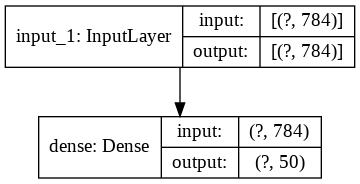

In [7]:
keras.utils.plot_model(encoder, show_shapes=True)

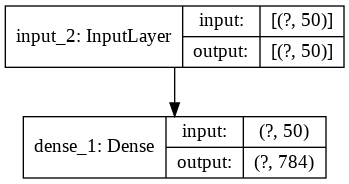

In [8]:
keras.utils.plot_model(decoder, show_shapes=True)

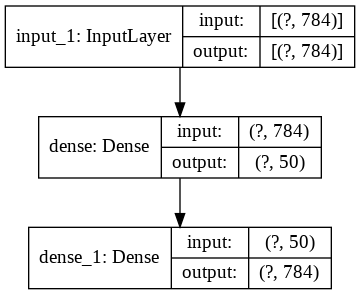

In [9]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [10]:
# Fit data
autoencoder.fit(input_train, input_train, epochs=10, batch_size=128, validation_split=validation_split)

Epoch 1/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2236 - val_loss: 0.1541
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.1354 - val_loss: 0.1208
Epoch 3/10
375/375 [==============================] - 2s 7ms/step - loss: 0.1120 - val_loss: 0.1048
Epoch 4/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0991 - val_loss: 0.0950
Epoch 5/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0912 - val_loss: 0.0889
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0863 - val_loss: 0.0852
Epoch 7/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0834 - val_loss: 0.0831
Epoch 8/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0818 - val_loss: 0.0819
Epoch 9/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0808 - val_loss: 0.0811
Epoch 10/10
375/375 [==============================] - 3s 7ms/step - loss: 0.0802 - val_loss: 0.0806

In [11]:
def plot_img_AE(input_sample, autoencoder):
  fig, axes = plt.subplots(1, 2)
  fig.set_size_inches(6, 3.5)

  input_sample_reshaped = input_sample.reshape((28, 28))
  
  reconstruction = autoencoder.predict([input_sample])
  reconsstruction_reshaped = reconstruction.reshape((28, 28))

  axes[0].imshow(input_sample_reshaped) 
  axes[0].set_title('Imágen original')
  axes[1].imshow(reconsstruction_reshaped)
  axes[1].set_title('Reconstrucción con AE')
  plt.show()

In [12]:
input_sample = input_test[9:10,]
input_sample.shape

(1, 784)

In [13]:
input_sample = input_test[10,]
input_sample=input_sample.reshape([1,-1])
input_sample.shape

(1, 784)

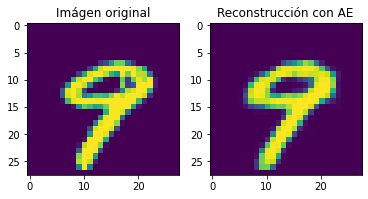

In [14]:
input_sample=input_test[9,].reshape([1,-1])

plot_img_AE(input_sample, autoencoder) # clasificacion img -> 9, AE img -> img

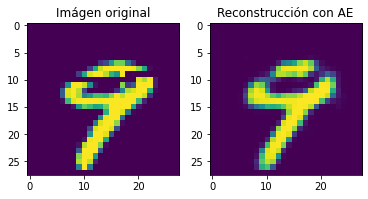

In [15]:
# Reconstruyo el 9
input_sample2=input_test[9,].reshape([1,-1]).copy()
input_sample2[0,270:300]=0
plot_img_AE(input_sample2, autoencoder)

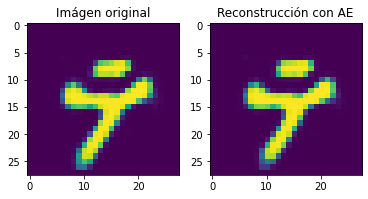

In [16]:
rec1 = autoencoder.predict([input_sample2])
rec2 = autoencoder.predict([rec1])
rec3 = autoencoder.predict([rec2])
plot_img_AE(rec3, autoencoder)


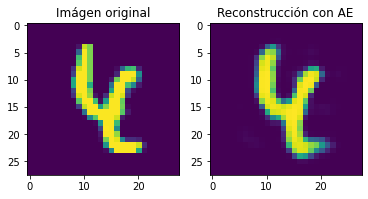

In [17]:
# Le saco el ruido (suavizó) la punta del 4
input_sample3 = input_test[160,].reshape([1,-1])
plot_img_AE(input_sample3, autoencoder)

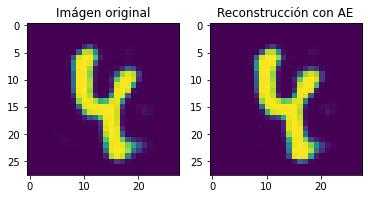

In [18]:
rec1 = autoencoder.predict([input_sample3])
rec2 = autoencoder.predict([rec1])
rec3 = autoencoder.predict([rec2])
#rec1_resh = rec1.reshape((28, 28))
plot_img_AE(rec3, autoencoder)

Muy optimista para obtener estos resultados: https://arxiv.org/pdf/1804.07723.pdf xD

## Ejercicios!

1) Generar un modelo con un espacio latente de 3 (reducción de dimensión)

2) Crear un autoencoder para los datos de fashion mnist

Epoch 1/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3362 - val_loss: 0.2569
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2492 - val_loss: 0.2392
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2357 - val_loss: 0.2317
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2307 - val_loss: 0.2282
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2280 - val_loss: 0.2261
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2260 - val_loss: 0.2244
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2245 - val_loss: 0.2231
Epoch 8/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2233 - val_loss: 0.2221
Epoch 9/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2223 - val_loss: 0.2211
Epoch 10/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2214 - val_loss: 0.2203

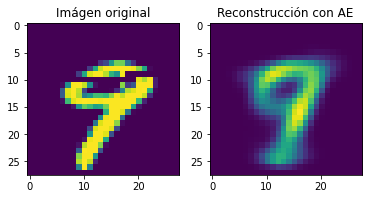

In [42]:
def generate_autoencoder(encoded_dim):
  """Devuelve encoder y autoencoder
  """
  # Define the layers
  inputs = Input(shape=input_shape)
  encoding_layer = Dense(encoded_dim, activation='relu')(inputs) # embedding!
  decoding_layer = Dense(initial_dimension, activation='sigmoid')(encoding_layer)
  # Instantiate the autoencoder
  autoencoder = Model(inputs, decoding_layer, name='full_autoencoder')
  # Instantiate the encoder
  encoder = Model(inputs, encoding_layer, name='encoder')
  # Instantiate the decoder
  encoded_input = Input(shape=(encoded_dim, ))
  final_ae_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, final_ae_layer(encoded_input), name='decoder')
  # Compile the autoencoder
  encoder.compile(optimizer='adam', loss='binary_crossentropy')
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  return encoder,autoencoder

encoder,autoencoder = generate_autoencoder(3)

# Fit data
autoencoder.fit(input_train, input_train, epochs=10, batch_size=128, validation_split=validation_split)

# Reconstruyo el 9
input_sample2=input_test[9,].reshape([1,-1]).copy()
input_sample2[0,270:300]=0
plot_img_AE(input_sample2, autoencoder)

In [33]:
!wget -P data/fashion http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -P data/fashion http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -P data/fashion http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -P data/fashion http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2020-10-24 13:50:27--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.94
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.94|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  15.7MB/s    in 1.6s    

2020-10-24 13:50:29 (15.7 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2020-10-24 13:50:29--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.94
Connecting to fashion-mnist.s3-we

In [34]:
!ls data/fashion/
#!gzip -d data/fashion/train-images-idx3-ubyte.gz
#!gzip -d data/fashion/train-labels-idx1-ubyte.gz
#!gzip -d data/fashion/t10k-images-idx3-ubyte.gz
#!gzip -d data/fashion/t10k-labels-idx1-ubyte.gz

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [46]:
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

X_train, y_train = load_mnist('data/fashion', kind='train')
X_test, y_test = load_mnist('data/fashion', kind='t10k')


# Parse numbers as floats
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_train.astype('float32')
y_test = y_train.astype('float32')

# Normalize data
X_train = X_train / 255
X_test = X_test / 255

784

In [52]:
def generate_autoencoder(encoded_dim):
  """Devuelve encoder y autoencoder
  """
  # Define the layers
  inputs = Input(shape=input_shape)
  encoding_layer = Dense(encoded_dim, activation='relu')(inputs) # embedding!
  decoding_layer = Dense(initial_dimension, activation='sigmoid')(encoding_layer)
  # Instantiate the autoencoder
  autoencoder = Model(inputs, decoding_layer, name='full_autoencoder')
  # Instantiate the encoder
  encoder = Model(inputs, encoding_layer, name='encoder')
  # Instantiate the decoder
  encoded_input = Input(shape=(encoded_dim, ))
  final_ae_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, final_ae_layer(encoded_input), name='decoder')
  # Compile the autoencoder
  encoder.compile(optimizer='adam', loss='binary_crossentropy')
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  return encoder,autoencoder

encoder,autoencoder = generate_autoencoder(encoded_dim=10)

# Fit data
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, validation_split=validation_split)


Epoch 1/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4276 - val_loss: 0.3596
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3416 - val_loss: 0.3314
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3246 - val_loss: 0.3218
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3174 - val_loss: 0.3168
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3136 - val_loss: 0.3140
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3115 - val_loss: 0.3124
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3104 - val_loss: 0.3117
Epoch 8/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3097 - val_loss: 0.3111
Epoch 9/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3092 - val_loss: 0.3106
Epoch 10/10
375/375 [==============================] - 2s 6ms/step - loss: 0.3089 - val_loss: 0.3103

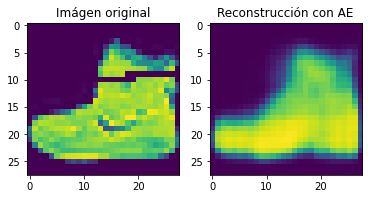

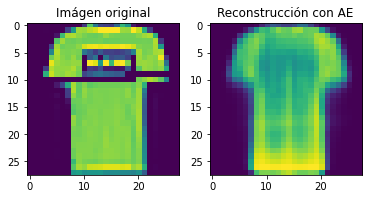

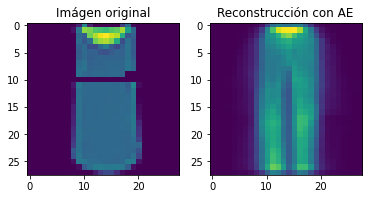

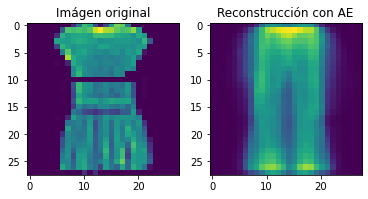

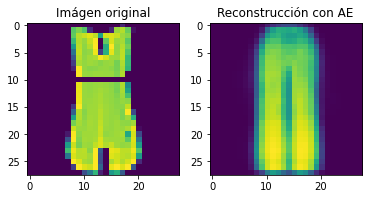

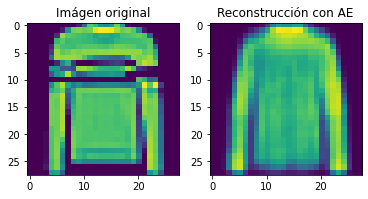

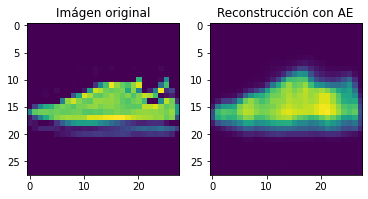

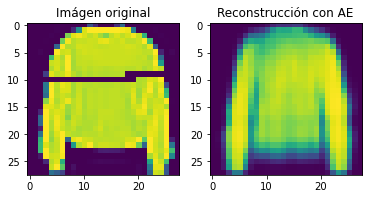

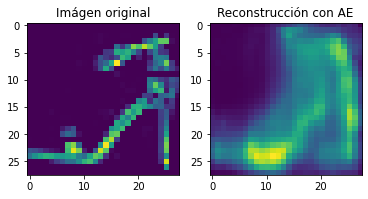

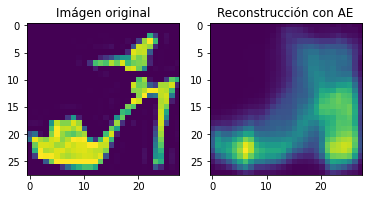

In [54]:
# Reconstruyo 
for i in range(10):
  input_sample2=X_test[i,].reshape([1,-1]).copy()
  input_sample2[0,270:300]=0
  plot_img_AE(input_sample2, autoencoder)